<a href="https://colab.research.google.com/github/snikhil17/Innomatics-Hackathon/blob/main/Movie_Data_EDA_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Tableau Dashboard: https://public.tableau.com/views/MoviesDataAnalysisHackathon/MoviesDataAnalysis?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link**

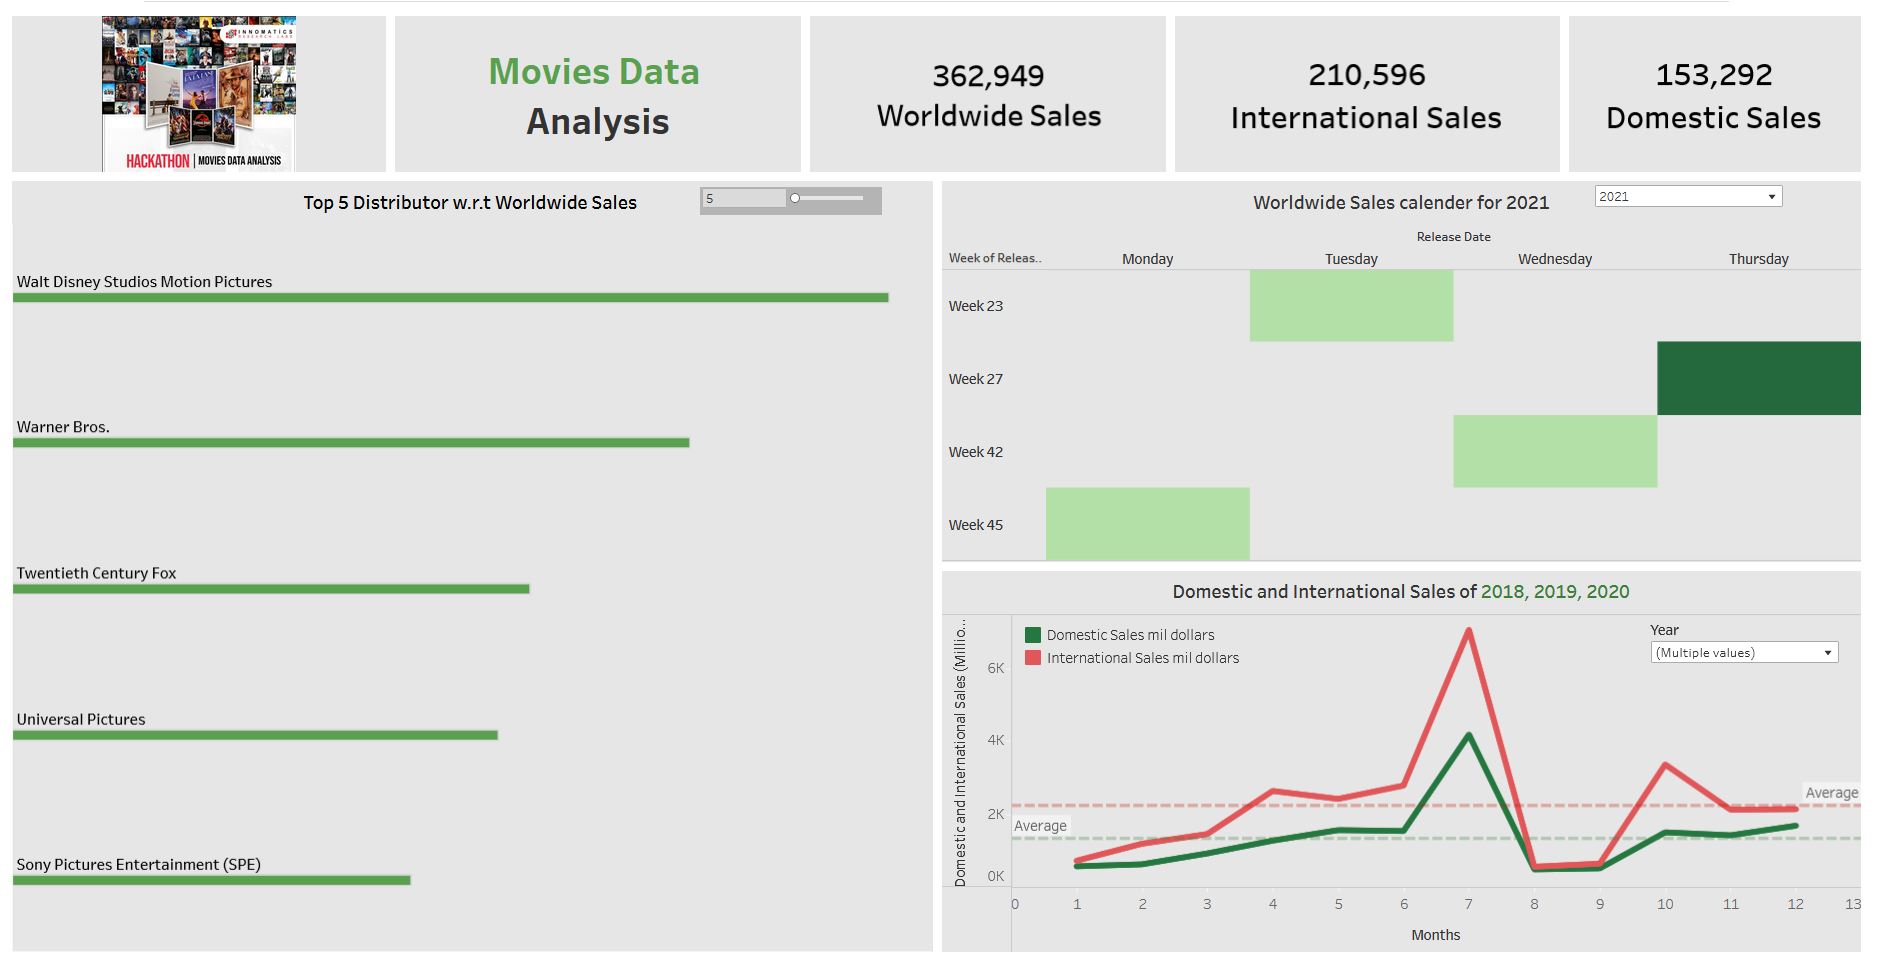

# **About Dataset**
- This dataset contains information about the top 1000 highest grossing hollywood films. It is up to date as of 10th January 2022.
- This data has been scraped from multiple sites and has been added together for performing various data operations. The data has been taken from imdb, rotten tomatoes and many other sites.


# **Aquiring Data**

In [ ]:
!wget https://raw.githubusercontent.com/snikhil17/Innomatics-Hackathon/main/data.csv

--2022-03-05 07:22:36--  https://raw.githubusercontent.com/snikhil17/Innomatics-Hackathon/main/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 287465 (281K) [text/plain]
Saving to: ‘data.csv.2’

data.csv.2          100%[===================>] 280.73K  --.-KB/s    in 0.03s   

2022-03-05 07:22:36 (8.59 MB/s) - ‘data.csv.2’ saved [287465/287465]



# **Load Required Libraries**

In [ ]:
# basic Libraries
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import re
import ast

# for Interactive Shells
from IPython.display import display


# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option( 'display.max_rows', 1000 )

import warnings
warnings.filterwarnings('ignore')

# **Load and View the dataset**

In [ ]:
data = pd.read_csv('data.csv').rename({'Unnamed: 0': 'RowNumber'}, axis =1)
data.head()

,RowNumber,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


# **Glimpse of Data**

In [ ]:
# check shape
print(data.shape)

(918, 11)


In [ ]:
# check info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   RowNumber                   918 non-null    int64 
 1   Title                       918 non-null    object
 2   Movie Info                  918 non-null    object
 3   Distributor                 918 non-null    object
 4   Release Date                800 non-null    object
 5   Domestic Sales (in $)       918 non-null    int64 
 6   International Sales (in $)  918 non-null    int64 
 7   World Sales (in $)          918 non-null    int64 
 8   Genre                       918 non-null    object
 9   Movie Runtime               918 non-null    object
 10  License                     744 non-null    object
dtypes: int64(4), object(7)
memory usage: 79.0+ KB


## **Missing Values Imputation**
- Lets check the rows having high Percentage of missing values in the dataset

In [ ]:
round((data.isnull().sum() / (len(data.index)) * 100) , 2).to_frame().rename({0: 'Missing Val %'}, axis =1).style.background_gradient('copper')

,Missing Val %
RowNumber,0.000000
Title,0.000000
Movie Info,0.000000
Distributor,0.000000
Release Date,12.850000
Domestic Sales (in $),0.000000
International Sales (in $),0.000000
World Sales (in $),0.000000
Genre,0.000000
Movie Runtime,0.000000


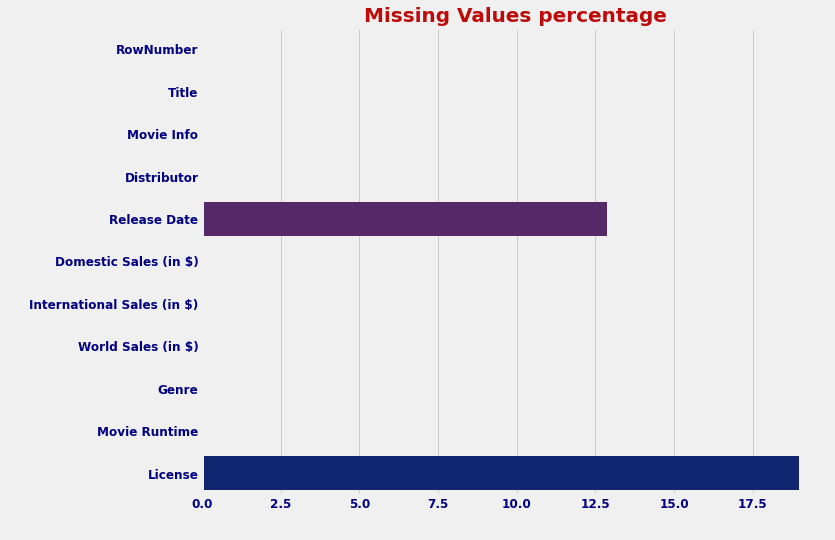

In [ ]:
missing_val_df = ((data.isnull().sum() / data.shape[0])*100).to_frame().reset_index().rename({'index': 'columns', 0: 'Missing Values percentage'}, axis = 1)

plt.figure(figsize = (10,8))
sns.barplot(data = missing_val_df, x = 'Missing Values percentage', y = 'columns',palette='dark')
plt.title('Missing Values percentage', fontsize = 20, fontweight = 'bold', color = '#bd0b0b')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'navy');

In [ ]:
data[data['Release Date'].isnull() == True][['Title', 'Release Date', 'Distributor','Movie Info']]

,Title,Release Date,Distributor,Movie Info
3,Black Panther (2018),NaN,Walt Disney Studios Motion Pictures,"T'Challa, heir to the hidden but advanced king..."
4,Avengers: Infinity War (2018),NaN,Walt Disney Studios Motion Pictures,The Avengers and their allies must be willing ...
5,Spider-Man: No Way Home (2021),NaN,Sony Pictures Entertainment (SPE),"With Spider-Man's identity now revealed, Peter..."
10,Incredibles 2 (2018),NaN,Walt Disney Studios Motion Pictures,The Incredibles family takes on a new mission ...
16,Finding Dory (2016),NaN,Walt Disney Studios Motion Pictures,Friendly but forgetful blue tang Dory begins a...
42,Harry Potter and the Deathly Hallows: Part 2 (...,NaN,Warner Bros.,"Harry, Ron, and Hermione search for Voldemort'..."
58,Zootopia (2016),NaN,Walt Disney Studios Motion Pictures,"In a city of anthropomorphic animals, a rookie..."
63,Aquaman (2018),NaN,Warner Bros.,"Arthur Curry, the human-born heir to the under..."
87,The Hobbit: An Unexpected Journey (2012),NaN,Warner Bros.,"A reluctant Hobbit, Bilbo Baggins, sets out to..."
91,Harry Potter and the Deathly Hallows: Part 1 (...,NaN,Warner Bros.,"As Harry, Ron, and Hermione race against time ..."


## **Observation:**
- License has highest missing value percentage (18.95) 
- Realease Date has 12.85 % missing Values.


In [ ]:
data['WeekNum'] = pd.to_datetime(data['Release Date']).dt.week
data['Month'] = pd.to_datetime(data['Release Date']).dt.month
data['year_from_release_date'] = pd.to_datetime(data['Release Date']).dt.year
data['year_from_title'] = data['Title'].apply(lambda x : x.split('(')[-1]).apply(lambda x: x[:-1])
data['year_from_title'] = pd.to_datetime(data['year_from_title']).dt.year
data.head()

,RowNumber,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,WeekNum,Month,year_from_release_date,year_from_title
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,51.0,12.0,2015.0,2015
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,17.0,4.0,2019.0,2019
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,51.0,12.0,2009.0,2009
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN,NaN,NaN,NaN,2018
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN,NaN,NaN,NaN,2018


In [ ]:
for i in data.dropna().index.tolist():
  if data['year_from_release_date'].iloc[i] != data['year_from_title'].iloc[i]:
    print(data.iloc[i])
    print()


RowNumber                                                                   194
Title                                                                300 (2006)
Movie Info                    King Leonidas of Sparta and a force of 300 men...
Distributor                                                        Warner Bros.
Release Date                                                      March 7, 2007
Domestic Sales (in $)                                                 210614939
International Sales (in $)                                            245453242
World Sales (in $)                                                    456068181
Genre                                                       ['Action', 'Drama']
Movie Runtime                                                       1 hr 57 min
License                                                                       R
WeekNum                                                                    10.0
Month                                   

- There are **13 movies whose title year and release year doesn't match**. Total number of **rows considered (excluding missing rows) are 744**. **Total errors** between two columns: **13/744 == 0.0175, approximately 1.7%**.  
- Hence, I'll be replacing **year** in missing rows of release year.

In [ ]:
data['Year'] = data['year_from_release_date'].fillna(data['year_from_title'])

In [ ]:
data.groupby('Distributor')['Month'].agg(["mean", "median"])

,mean,median
Distributor,,
20th Century Studios,NaN,NaN
Artisan Entertainment,7.000000,7.0
Columbia Pictures,9.000000,9.0
Dimension Films,7.857143,8.0
DreamWorks,6.578947,6.0
DreamWorks Distribution,7.875000,7.0
FilmDistrict,6.000000,6.0
Focus Features,10.500000,10.5
Fox Searchlight Pictures,11.666667,12.0


In [ ]:
"""Checking Mode of Month of release date, when grouped by Distributor"""
data.groupby('Distributor')['Month'].value_counts(dropna = False)

Distributor                          Month
20th Century Studios                 NaN       1
Artisan Entertainment                7.0       1
Columbia Pictures                    6.0       2
                                     12.0      2
                                     NaN       1
                                     7.0       1
                                     11.0      1
Dimension Films                      12.0      2
                                     2.0       1
                                     4.0       1
                                     7.0       1
                                     8.0       1
                                     10.0      1
DreamWorks                           6.0       5
                                     3.0       3
                                     5.0       3
                                     10.0      3
                                     NaN       2
                                     11.0      2
                          

In [ ]:
display(data[data['Distributor'] == '20th Century Studios'])
display(data[data['Distributor'] == 'USA Films'])

,RowNumber,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,WeekNum,Month,year_from_release_date,year_from_title,Year
529,529,Free Guy (2021),A bank teller discovers that he's actually an ...,20th Century Studios,NaN,121626598,209877159,331503757,"['Action', 'Adventure', 'Comedy', 'Fantasy', '...",1 hr 55 min,NaN,NaN,NaN,NaN,2021,2021.0


,RowNumber,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,WeekNum,Month,year_from_release_date,year_from_title,Year
517,517,Traffic (2000),A conservative judge is appointed by the Presi...,USA Films,NaN,124115725,83400000,207515725,"['Crime', 'Drama', 'Thriller']",2 hr 27 min,NaN,NaN,NaN,NaN,2000,2000.0


## **Imputing Months and Date in Released Date**
- Since we dont have much data to play around, I will impute Month by Grouping the data on Distributor variable. 
- Hypothesis here is: Distributor release movies in a pattern and only column to capture that pattern is Month, which is extracted using Release Date. Grouping by Week and(or) Year didnt help in this situation.
- In following code, I checked mean, median and mode and decided to replace the missing month using median of month as mode doesn't give a specific value for some Distributors.
- There are two distributors who have released only 1 movie and they have missing values, hence I'll drop these values.

In [ ]:
data = data.drop([529,517]).reset_index(drop=True)

In [ ]:
month_median_map = data.groupby("Distributor")["Month"].median().to_dict()
month_median_map

{'Artisan Entertainment': 7.0,
 'Columbia Pictures': 9.0,
 'Dimension Films': 8.0,
 'DreamWorks': 6.0,
 'DreamWorks Distribution': 7.0,
 'FilmDistrict': 6.0,
 'Focus Features': 10.5,
 'Fox Searchlight Pictures': 12.0,
 'IFC Films': 4.0,
 'Lionsgate': 8.0,
 'Metro-Goldwyn-Mayer (MGM)': 11.0,
 'Miramax': 9.0,
 'New Line Cinema': 8.0,
 'Newmarket Films': 2.0,
 'Orion Pictures': 11.0,
 'Paramount Pictures': 7.0,
 'Relativity Media': 11.0,
 'Revolution Studios': 6.5,
 'Roadside Attractions': 3.0,
 'STX Entertainment': 7.0,
 'Screen Gems': 4.0,
 'Sony Pictures Classics': 12.0,
 'Sony Pictures Entertainment (SPE)': 7.0,
 'Summit Entertainment': 11.0,
 'The Weinstein Company': 11.0,
 'TriStar Pictures': 6.0,
 'Twentieth Century Fox': 6.0,
 'United Artists': 12.0,
 'United Artists Releasing': 10.0,
 'Universal Pictures': 6.0,
 'Walt Disney Studios Motion Pictures': 7.0,
 'Warner Bros.': 7.0}

In [ ]:
month_median_series = data['Distributor'].map(month_median_map)
data["Month"] = data["Month"].fillna(month_median_series)

## **Some Feature Engineering to impute Release Date**
- Created a new col Final_Date which has date in a format 20191201. This variable is created using year and Month, Day is chosen as 1.
- Issue with this is when month is single digit number say 4, then we have inconsitency in the data values.
- Hence I used simple string slicing to correct the required format of single digit month. Finally ran a loop using the length of sting which helped to ammend only those rows which needs to be corrected.

In [ ]:
new_col = []
for i in range(data.shape[0]):
  new_col.append(f"{int(data.Year[i])}{int(data.Month[i])}01")

data['Final_Date'] = new_col

In [ ]:
data.Final_Date[1][:4] + '0' + data.Final_Date[1][4:]

'20190401'

In [ ]:
"""Taking care of single digit months"""
for i in range(data.shape[0]):
  if len(data.Final_Date[i]) != 8:
    data.Final_Date[i] = data.Final_Date[i][:4] + '0' + data.Final_Date[i][4:]


In [ ]:
data['Final_Date'] = pd.to_datetime(data['Final_Date']).dt.strftime('%Y-%m-%d')     # Converting Final_Date to Date-time col
data['Release Date'] = pd.to_datetime(data['Release Date']).dt.strftime('%Y-%m-%d') # Converting Release Date to Date-time col
data['Release Date'] = data['Release Date'].fillna(data['Final_Date'])              # Filling Missing values of Release Date.

## **Imputing Missing Values in License**
- Since we dont have much data to play around, I will impute License by Grouping the data on Distributor variable. 
- Hypothesis here is: Distributor will usually select the similar license and may be due to some reason data is missed.
- In following code, I checked count and mode and decided to replace the missing month using mode when grouped by Distributors.
- There is one distributor **Orion Pictures** who doesn't have any license. Hence, I dropped this distributor (3 rows affected).

In [ ]:
data.groupby('Distributor')['License'].agg(["count", pd.Series.mode])  # Counting and checking mode of License when grouped by Distributor

,count,mode
Distributor,,
Artisan Entertainment,1,R
Columbia Pictures,3,R
Dimension Films,7,R
DreamWorks,19,PG
DreamWorks Distribution,15,"[PG, PG-13, R]"
FilmDistrict,2,"[PG-13, R]"
Focus Features,2,"[PG, R]"
Fox Searchlight Pictures,3,R
IFC Films,1,PG


In [ ]:
data[data['Distributor'] == 'Orion Pictures']  # Curious case of Orion Pictures

,RowNumber,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,WeekNum,Month,year_from_release_date,year_from_title,Year,Final_Date
245,245,Dances with Wolves (1990),"Lieutenant John Dunbar, assigned to a remote w...",Orion Pictures,1990-11-09,184208848,240000000,424208848,"['Adventure', 'Drama', 'Western']",3 hr 1 min,NaN,45.0,11.0,1990.0,1990,1990.0,1990-11-01
424,424,Platoon (1986),"Chris Taylor, a neophyte recruit in Vietnam, f...",Orion Pictures,1986-12-19,138530565,15067,138545632,"['Drama', 'War']",2 hr,NaN,51.0,12.0,1986.0,1986,1986.0,1986-12-01
465,465,The Silence of the Lambs (1991),A young F.B.I. cadet must receive the help of ...,Orion Pictures,1991-02-14,130742922,142000000,272742922,"['Crime', 'Drama', 'Horror', 'Thriller']",1 hr 58 min,NaN,7.0,2.0,1991.0,1991,1991.0,1991-02-01


In [ ]:
data = data.drop([245, 424, 465]).reset_index(drop=True)                                             # Removing Rows using Index
data["License"] = data.groupby("Distributor")["License"].transform(lambda x: x.fillna(x.mode()[0]))  # imputing Missing values in License using Mode (when group by Distributor)

### **Remove un-necessary columns created for Missing Value Imputation**

In [ ]:
"""Creating WeekNum and Month Again"""
data['WeekNum'] = pd.to_datetime(data['Release Date']).dt.week
data['Month'] = pd.to_datetime(data['Release Date']).dt.month

"""Removing year_from_release_date, year_from_title and Final_Date"""
data = data.drop(['year_from_release_date', 'year_from_title', 'Final_Date'], axis =1)

data.Year = data.Year.astype(int)
data.head()

,RowNumber,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,WeekNum,Month,Year
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,51,12,2015
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,17,4,2019
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,51,12,2009
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,2018-07-01,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,PG,26,7,2018
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,2018-07-01,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,PG,26,7,2018


In [ ]:
data.isnull().sum()

RowNumber                     0
Title                         0
Movie Info                    0
Distributor                   0
Release Date                  0
Domestic Sales (in $)         0
International Sales (in $)    0
World Sales (in $)            0
Genre                         0
Movie Runtime                 0
License                       0
WeekNum                       0
Month                         0
Year                          0
dtype: int64

# **Feature Engineering**
### **Domestic, International and World Sales**
- Lets convert the **Domestic, International and World Sales** from dollars to Million Dollars to make our analysis easier

### **Movie Runtime**
- Convert Movie Runtime in Hours

### **Genre:**
- Many Movies have lot of Genres.
- I will keep only top 4 genres of the movie. 
- If they dont have 2nd or 3rd or 4th genre we will use the 1st genre in that place.

In [ ]:
data['Domestic_Sales_mil_dollars'] = data['Domestic Sales (in $)']/1000000
data['International_Sales_mil_dollars'] = data['International Sales (in $)']/1000000
data['World_Sales_mil_dollars'] = data['World Sales (in $)']/1000000

data = data.drop(['Domestic Sales (in $)', 'International Sales (in $)', 'World Sales (in $)'], axis =1)

In [ ]:

f"{re.split(' hr |, | min',data['Movie Runtime'][2])[0]}.{re.split(' hr |, | min',data['Movie Runtime'][2])[1]}"

'2.42'

In [ ]:
re.split(' hr',data['Movie Runtime'][155])[0]

'2'

In [ ]:
for i in range(data.shape[0]):
  try:
    data['Movie Runtime'][i] = f"{re.split(' hr |, | min',data['Movie Runtime'][i])[0]}.{re.split(' hr |, | min',data['Movie Runtime'][i])[1]}"
  except:
    data['Movie Runtime'][i] = re.split(' hr',data['Movie Runtime'][i])[0]

In [ ]:
data['Movie Runtime'] = data['Movie Runtime'].astype('float')

In [ ]:
data['Genre'].value_counts().head(30)

['Action', 'Adventure', 'Sci-Fi']                                      56
['Comedy']                                                             35
['Comedy', 'Romance']                                                  30
['Action', 'Adventure', 'Thriller']                                    28
['Action', 'Crime', 'Thriller']                                        23
['Comedy', 'Drama', 'Romance']                                         23
['Action', 'Adventure', 'Sci-Fi', 'Thriller']                          22
['Action', 'Adventure', 'Fantasy', 'Sci-Fi']                           21
['Adventure', 'Animation', 'Comedy', 'Family', 'Fantasy']              17
['Adventure', 'Animation', 'Comedy', 'Family']                         13
['Action', 'Thriller']                                                 13
['Drama', 'Romance']                                                   13
['Action', 'Adventure', 'Fantasy']                                     12
['Action', 'Comedy', 'Crime']         

In [ ]:
data['Genre'][1]

"['Action', 'Adventure', 'Drama', 'Sci-Fi']"

In [ ]:
ast.literal_eval(data['Genre'][1])[0]

'Action'

In [ ]:
genre_all = []
for i in range(data.shape[0]):
  genre_all.append(ast.literal_eval(data['Genre'][i]))
data['Moviegenres'] = genre_all

In [ ]:
data['genre1'] = data['Moviegenres'].apply(lambda x: x[0])

# Some of the movies have only one genre. In such cases, assign the same genre to 'genre_2' as well
data['genre2'] = data['Moviegenres'].apply(lambda x: x[1] if len(x) > 1 else x[0])
data['genre3'] = data['Moviegenres'].apply(lambda x: x[2] if len(x) > 2 else x[0])
data['genre4'] = data['Moviegenres'].apply(lambda x: x[3] if len(x) > 3 else x[0])

data[['genre1','genre2','genre3','genre4',]].head()

,genre1,genre2,genre3,genre4
0,Action,Adventure,Sci-Fi,Action
1,Action,Adventure,Drama,Sci-Fi
2,Action,Adventure,Fantasy,Sci-Fi
3,Action,Adventure,Sci-Fi,Action
4,Action,Adventure,Sci-Fi,Action


# **Exploratory Data Analysis and Visualization**

## **Top 10 Worldwide Selling Movies**

In [ ]:
data[['Title', 'Domestic_Sales_mil_dollars', 'International_Sales_mil_dollars',	'World_Sales_mil_dollars']].head(10).\
sort_values(by = 'World_Sales_mil_dollars', ascending = False).style.background_gradient(subset = 'World_Sales_mil_dollars',cmap = 'RdBu')

,Title,Domestic_Sales_mil_dollars,International_Sales_mil_dollars,World_Sales_mil_dollars
2,Avatar (2009),760.507625,2086.738578,2847.246203
1,Avengers: Endgame (2019),858.373000,1939.128328,2797.501328
6,Titanic (1997),659.363944,1542.283320,2201.647264
0,Star Wars: Episode VII - The Force Awakens (2015),936.662225,1132.859475,2069.521700
4,Avengers: Infinity War (2018),678.815482,1369.544272,2048.359754
7,Jurassic World (2015),652.385625,1018.130819,1670.516444
5,Spider-Man: No Way Home (2021),675.813257,868.642706,1544.455963
8,The Avengers (2012),623.357910,895.457605,1518.815515
3,Black Panther (2018),700.426566,647.171407,1347.597973
9,Star Wars: Episode VIII - The Last Jedi (2017),620.181382,712.517448,1332.698830


## **Comparision of Sales w.r.t Genres** 
- Domestic Sales of Genre
- International Sales of Genre     
- World Sales of Genre





Movie with Most Domestic Sales from each Genre


,genre1,Title,Domestic_Sales_mil_dollars
0,Action,Star Wars: Episode VII - The Force Awakens (2015),936.662225
6,Drama,Titanic (1997),659.363944
11,Adventure,The Lion King (2019),543.638043
62,Crime,Joker (2019),335.451311
69,Horror,It (2017),328.828874
102,Comedy,Home Alone (1990),285.761243
110,Animation,Sing (2016),270.448425
124,Biography,The Blind Side (2009),255.959475
176,Mystery,The Da Vinci Code (2006),217.536138
541,Documentary,Fahrenheit 9/11 (2004),119.194771


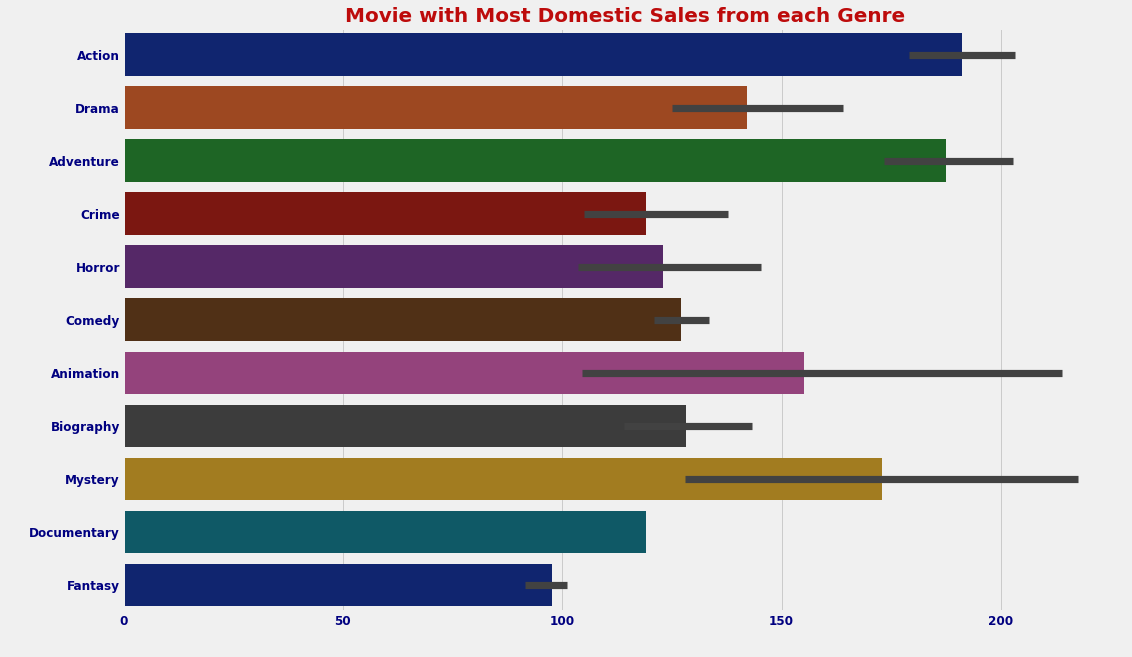

In [ ]:
"""FIRST group of Genre with domestic Sales of the movies of that genre."""
display(data[['genre1', 'Domestic_Sales_mil_dollars']].groupby(['genre1']).agg(['max','mean','min']).style.background_gradient(cmap='magma_r'))
print('\n\n')
print('Movie with Most Domestic Sales from each Genre')
display(data.loc[data.groupby(data['genre1'])['Domestic_Sales_mil_dollars'].idxmax()][['genre1', 'Title','Domestic_Sales_mil_dollars']]\
        .sort_values(by = 'Domestic_Sales_mil_dollars', ascending = False).style.background_gradient(cmap = 'RdBu'))

print('\n\n')
bar_graph_data = data.loc[data.groupby(data['genre1'])['Domestic_Sales_mil_dollars'].idxmax()][['genre1', 'Title','Domestic_Sales_mil_dollars']]
plt.figure(figsize = (16,10))
sns.barplot(data = data, x = 'Domestic_Sales_mil_dollars', y= 'genre1', palette='dark')
plt.title('Movie with Most Domestic Sales from each Genre', fontsize = 20, fontweight = 'bold', color = '#bd0b0b')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'navy');

## **Observations:**
- Movies with most domestic sales are **Action, Drama, Adventure**
- Genre with least International Sales is **Fantasy**
- Best Selling Movie Internationally from **Action Genre : Star Wars: Episode VII - The Force Awakens (2015)**
- Best Selling Movie Internationally from **Drama Genre : Titanic**
- Best Selling Movie Internationally from **Adventure : The Lion King.**




Movie with Most International Sales from each Genre


,genre1,Title,International_Sales_mil_dollars
2,Action,Avatar (2009),2086.738578
6,Drama,Titanic (1997),1542.283320
11,Adventure,The Lion King (2019),1119.261396
62,Crime,Joker (2019),738.968073
180,Biography,Bohemian Rhapsody (2018),694.141269
176,Mystery,The Da Vinci Code (2006),542.470807
395,Comedy,Mamma Mia! (2008),467.088155
69,Horror,It (2017),372.967570
110,Animation,Sing (2016),363.759959
694,Fantasy,Sleepy Hollow (1999),105.000000


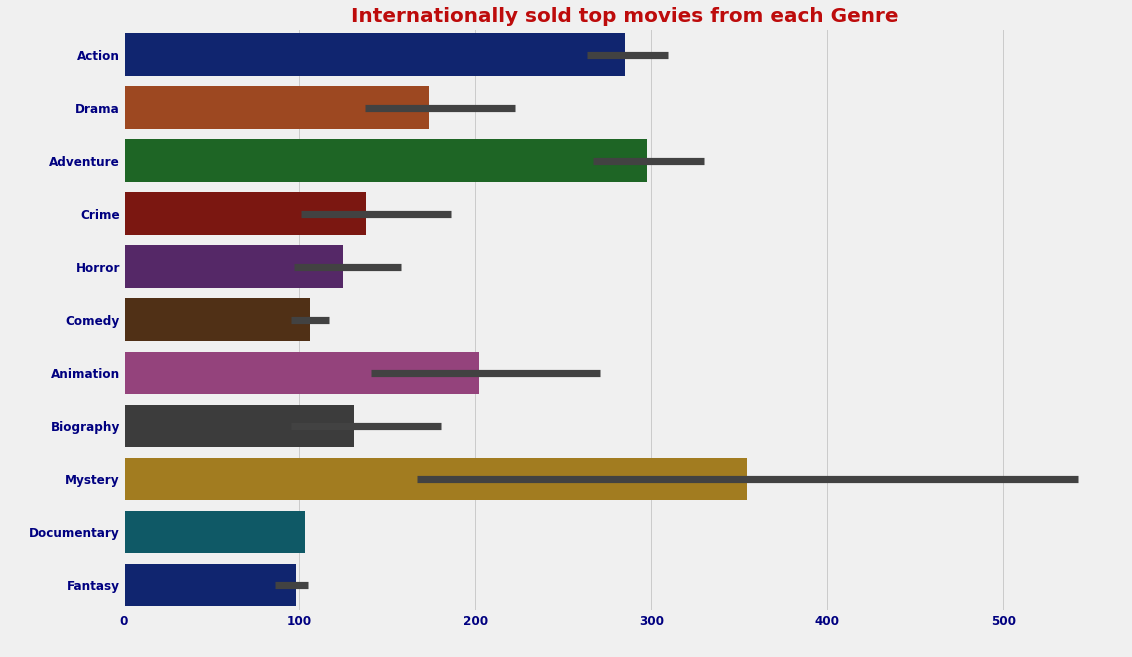

In [ ]:
"""FIRST group of Genre with International Sales of the movies of that genre."""
display(data[['genre1', 'International_Sales_mil_dollars']].groupby(['genre1']).agg(['max','mean','min']).style.background_gradient(cmap='magma_r'))
print('\n\n')
print('Movie with Most International Sales from each Genre')
display(data.loc[data.groupby(data['genre1'])['International_Sales_mil_dollars'].idxmax()][['genre1', 'Title','International_Sales_mil_dollars']]\
        .sort_values(by = 'International_Sales_mil_dollars', ascending = False).style.background_gradient(cmap = 'RdBu'))

print('\n\n')
bar_graph_data = data.loc[data.groupby(data['genre1'])['International_Sales_mil_dollars'].idxmax()][['genre1', 'Title','International_Sales_mil_dollars']]
plt.figure(figsize = (16,10))
sns.barplot(data = data, x = 'International_Sales_mil_dollars', y= 'genre1', palette='dark')
plt.title('Internationally sold top movies from each Genre', fontsize = 20, fontweight = 'bold', color = '#bd0b0b')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'navy');

## **Observations:**
- Most Sold genre Internationally are **Action, Drama, Adventure**
- Genre with least International Sales is **Documentary and Fantasy**
- Best Selling Movie Internationally from **Action Genre : Avatar**
- Best Selling Movie Internationally from **Drama Genre : Titanic**
- Best Selling Movie Internationally from **Adventure : The Lion King.**
    





Movie with Most World Sales from each Genre


,genre1,Title,World_Sales_mil_dollars
2,Action,Avatar (2009),2847.246203
6,Drama,Titanic (1997),2201.647264
11,Adventure,The Lion King (2019),1662.899439
62,Crime,Joker (2019),1074.419384
180,Biography,Bohemian Rhapsody (2018),910.809311
176,Mystery,The Da Vinci Code (2006),760.006945
69,Horror,It (2017),701.796444
110,Animation,Sing (2016),634.208384
395,Comedy,Mamma Mia! (2008),611.257819
541,Documentary,Fahrenheit 9/11 (2004),222.446882


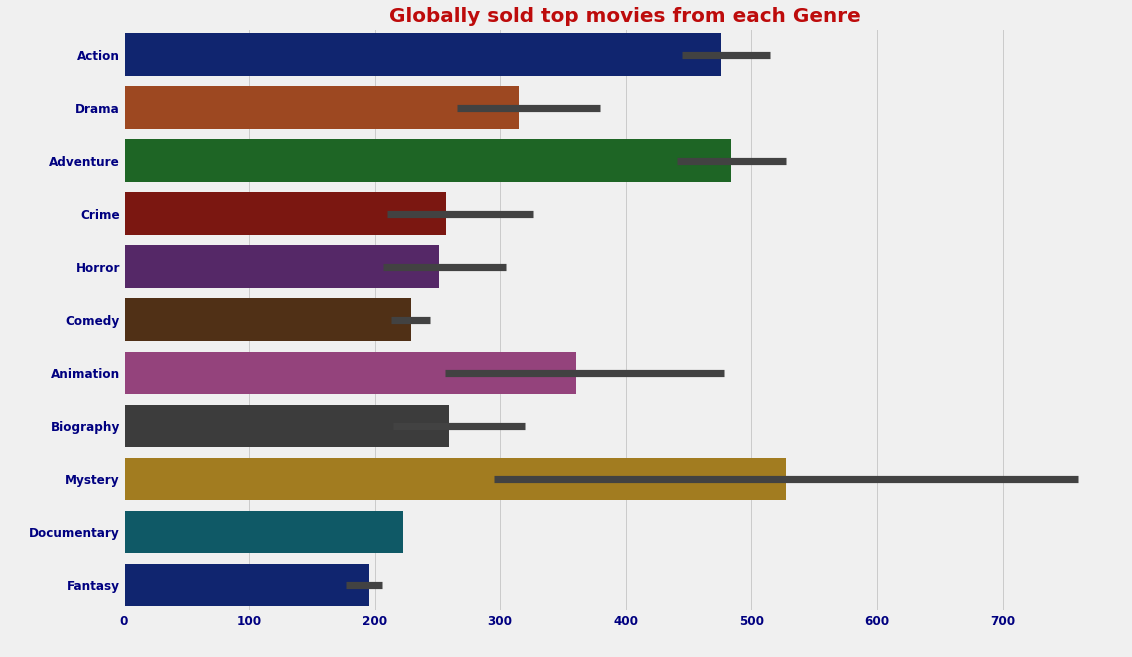

In [ ]:
"""FIRST group of Genre with World Sales of the movies of that genre."""
display(data[['genre1', 'World_Sales_mil_dollars']].groupby(['genre1']).agg(['max','mean','min']).style.background_gradient(cmap='magma_r'))
print('\n\n')
print('Movie with Most World Sales from each Genre')
display(data.loc[data.groupby(data['genre1'])['World_Sales_mil_dollars'].idxmax()][['genre1', 'Title','World_Sales_mil_dollars']]\
        .sort_values(by = 'World_Sales_mil_dollars', ascending = False).style.background_gradient(cmap = 'RdBu'))
print('\n\n')
bar_graph_data = data.loc[data.groupby(data['genre1'])['World_Sales_mil_dollars'].idxmax()][['genre1', 'Title','World_Sales_mil_dollars']]
plt.figure(figsize = (16,10))
sns.barplot(data = data, x = 'World_Sales_mil_dollars', y= 'genre1', palette='dark')
plt.title('Globally sold top movies from each Genre', fontsize = 20, fontweight = 'bold', color = '#bd0b0b')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'navy');


## **Observations:**
- Most Sold genre globally are **Action, Drama, Adventure**
- Genre with least global Sales is **Documentary**
- Best Selling Movie worldwide from **Action Genre : Avatar**
- Best Selling Movie worldwide from **Drama Genre : Titanic**
- Best Selling Movie worldwide from **Adventure : The Lion King.**
    


## **Movies Released month-year Analysis**

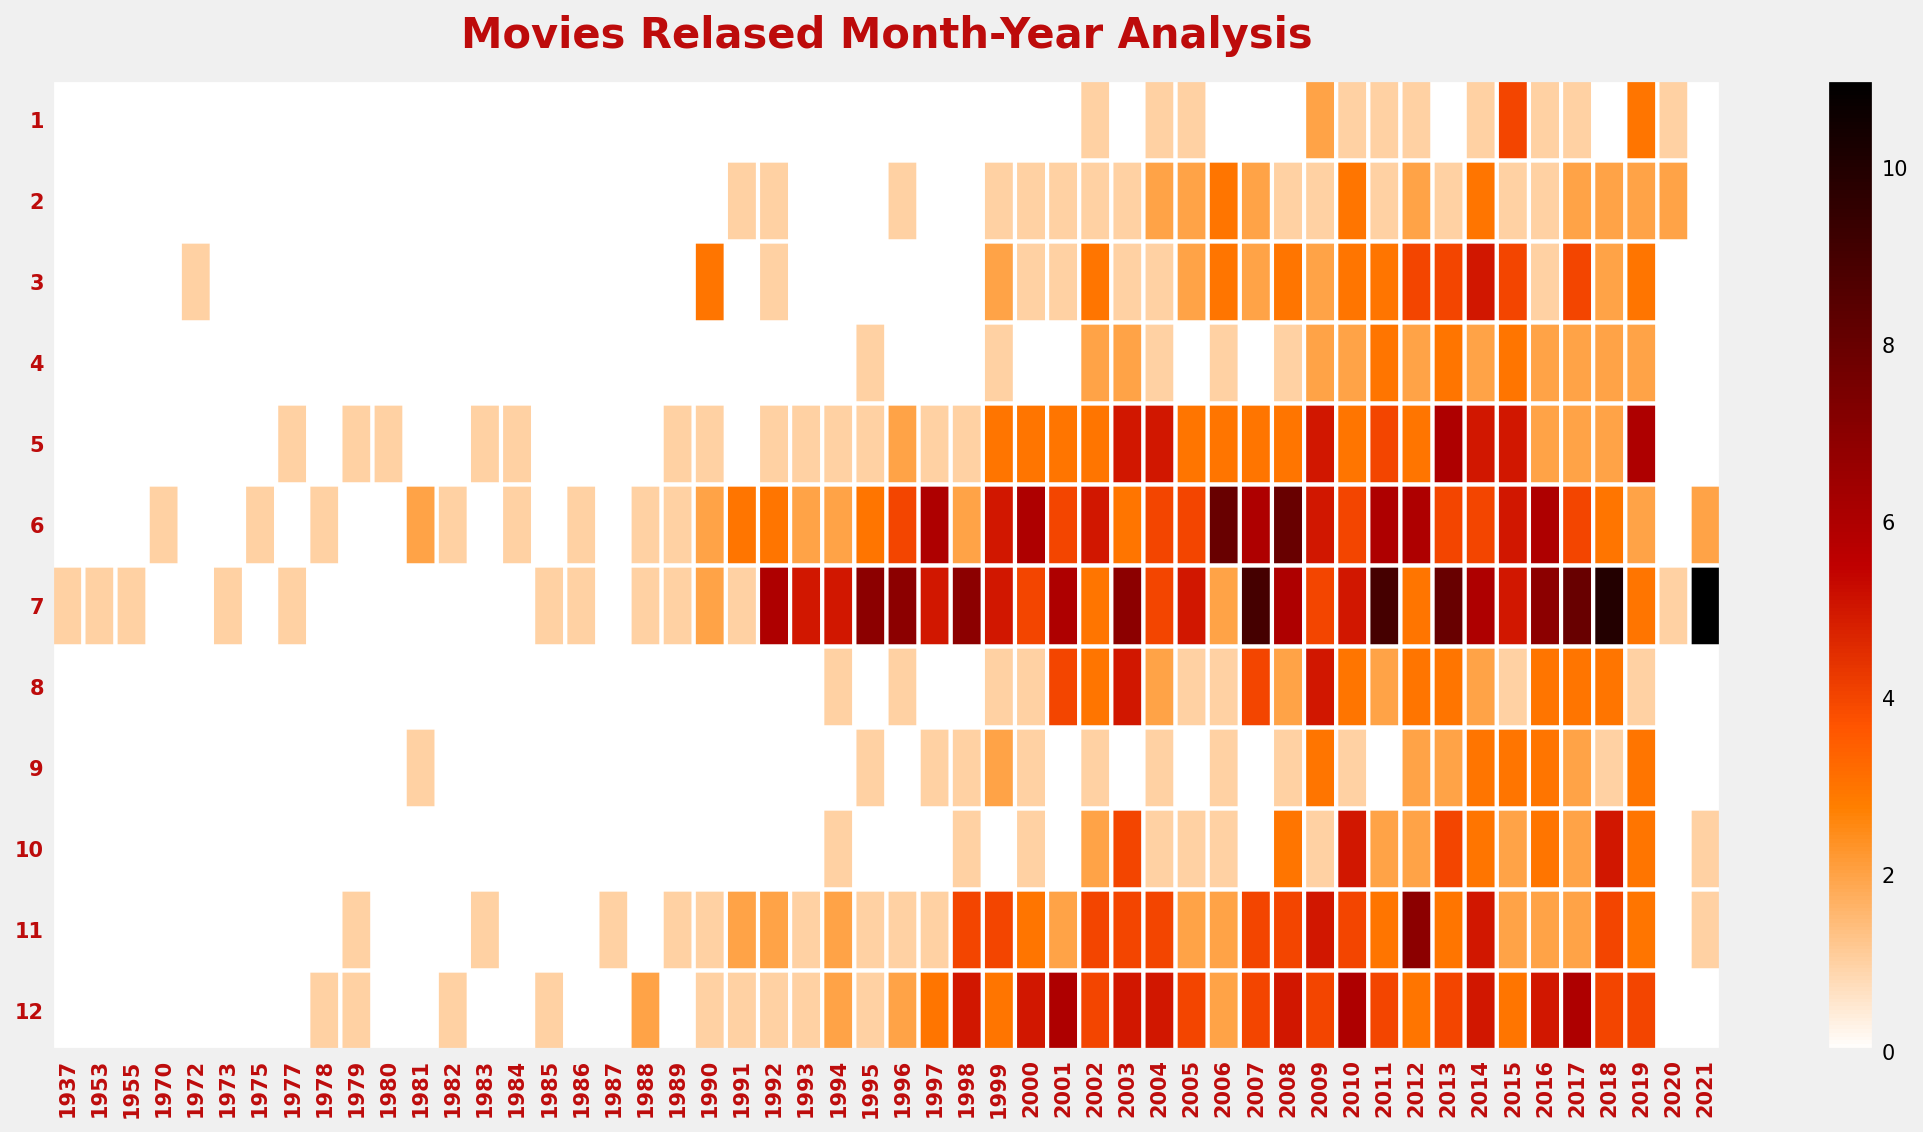

In [ ]:
month_order = [12,11,10,9,8,7,6,5,4,3,2,1]
df_corr = data.groupby('Year')['Month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(16, 8), dpi = 150)
plt.pcolor(df_corr, cmap='gist_heat_r', edgecolors='white', linewidths=2)
plt.xticks(np.arange(0.5, len(df_corr.columns), 1), df_corr.columns, fontsize=10 , fontweight='bold', rotation = 90, color = '#bd0b0b')
plt.yticks(np.arange(0.5, len(df_corr.index), 1), df_corr.index, fontsize=10 , fontweight='bold', color = '#bd0b0b')

plt.title('Movies Relased Month-Year Analysis', fontsize=20, fontweight='bold', position=(0.50, 1.0+0.02), color = '#bd0b0b')
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=10) 
cbar.ax.minorticks_on()
plt.show()

## **Observations:**
- Over the years movies has increased, especially more and more movies **started releasing in July(7)** 
- **2020 due to lockdown and covid situation observed least movie released.**
- Again on July 2021 many movies were released.
- In 2019 and 2018 highest movies were released in May and July respectively  

## **Movies Released Month-Distributer Analysis**

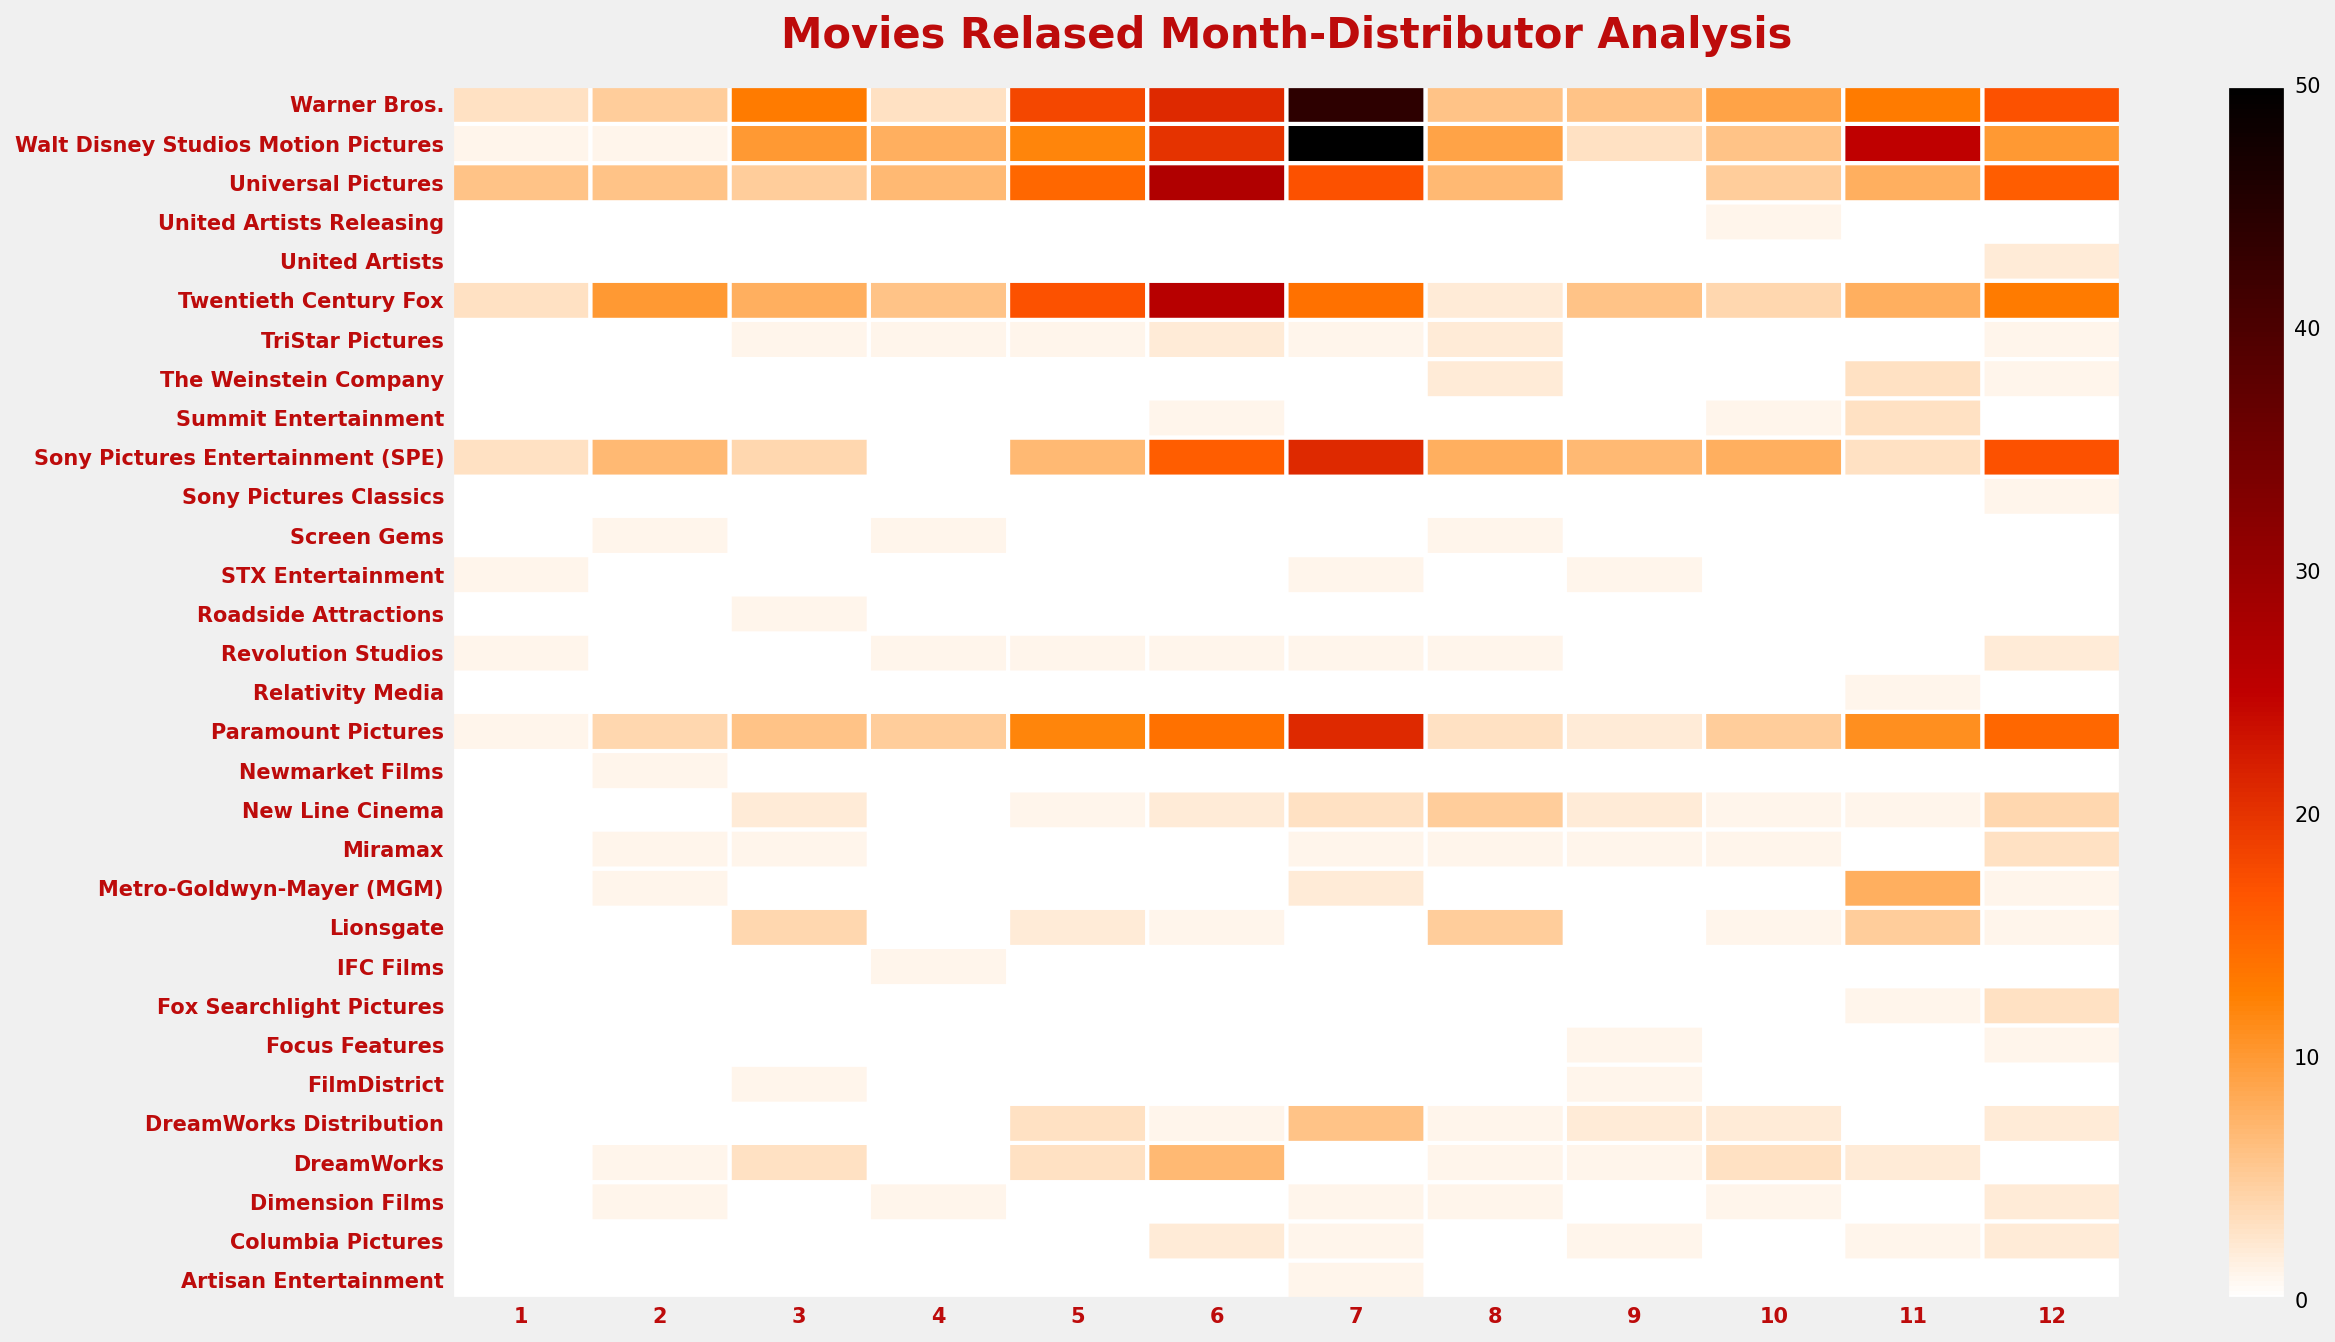

In [ ]:
month_order = [12,11,10,9,8,7,6,5,4,3,2,1][::-1]
df_corr = data.groupby('Distributor')['Month'].value_counts().unstack().fillna(0)[month_order]
plt.figure(figsize=(16, 10), dpi = 150)
plt.pcolor(df_corr, cmap='gist_heat_r', edgecolors='white', linewidths=2)
plt.xticks(np.arange(0.5, len(df_corr.columns), 1), df_corr.columns, fontsize=10 , fontweight='bold', color = '#bd0b0b')
plt.yticks(np.arange(0.5, len(df_corr.index), 1), df_corr.index, fontsize=10 , fontweight='bold', color = '#bd0b0b')

plt.title('Movies Relased Month-Distributor Analysis', fontsize=20, fontweight='bold', position=(0.50, 1.0+0.02), color = '#bd0b0b')
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=10) 
cbar.ax.minorticks_on()
plt.show()

## **Observations:**
- **Warner Bros and Walt disney Studios** released the **highest number of movies in July**
- Most of the movies were released in **June and July** 
- Walt disney Studios also released around 30 movies in **November.**

## **Distributor and Duration relation**
- ***What Duration of movie does a Distributor generally makes?***

In [ ]:
display(data[['Distributor', 'Movie Runtime']].groupby('Distributor').agg(['mean', 'max', 'min', 'std']).fillna(0).style.background_gradient(cmap='bone_r'))

print(f"\nLongest Movie with 3.9 hrs runtime: {data[data['Movie Runtime'] == max(data['Movie Runtime'])]['Title'].tolist()[0]}")
print(f"\nShortest Movie with 1.16 hrs runtime: {data[data['Movie Runtime'] == min(data['Movie Runtime'])]['Title'].tolist()[0]}")


Longest Movie with 3.9 hrs runtime: The Green Mile (1999)

Shortest Movie with 1.16 hrs runtime: Lady and the Tramp (1955)


## **Observations:**
- Above Table shows unique distributor and movie Runtime measures (mean, max, min, standard deviation)  
- **Focus Features** has **lowest standard deviation of 0.04** which means they usually stay consistent with Runtime of the movie. **Mean of their Movie Runtime is 2.17**
- **STX Entertainment** has **highest standard deviation of 0.67** which means they have created movies of various runtime (short duration and long duration). Their **mean is 1.83, maximum runtime is	2.60 and minimum runtime is	1.40**
- **Warner Bros** has created movie with **highest runtime i.e. 3.90 hrs and Movie Name:  The Green Mile (1999).** 
- **Walt Disney Studios Motion Pictures** created a movie with **lowest runtime i.e. 1.16 hrs and Movie Name:  Lady and the Tramp (1955).**

## **License Analysis**
- Which License is most used ?
- Each Distributor prefers which License

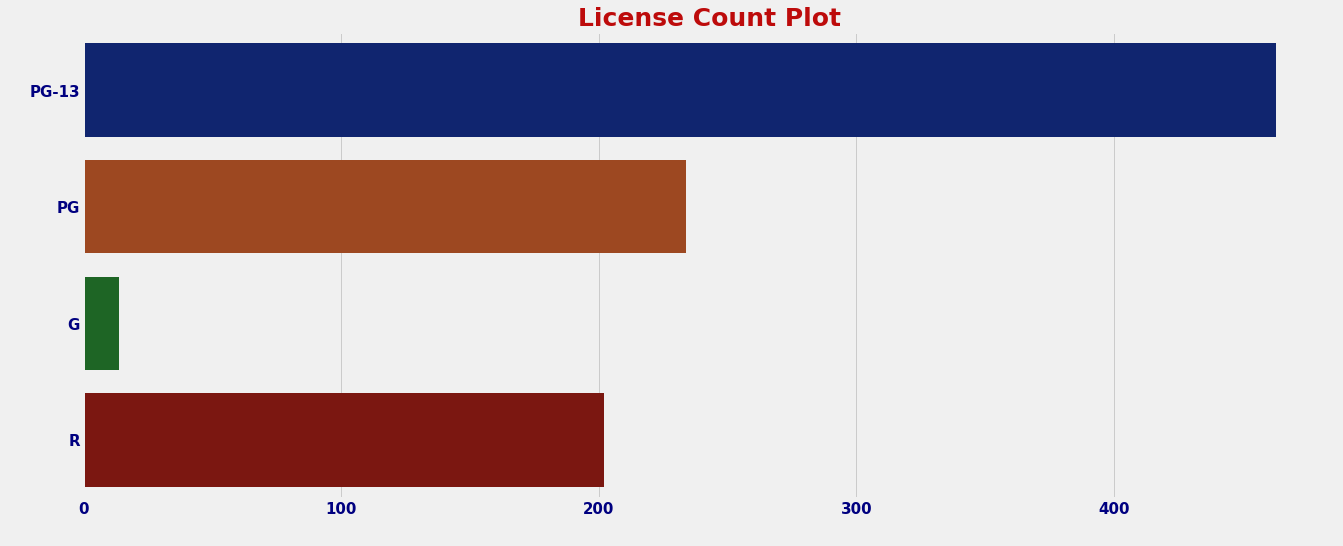

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(data = data , y = 'License', palette = 'dark')
plt.title('License Count Plot', fontsize = 25, fontweight = 'bold', color = '#bd0b0b')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(fontsize = 15, fontweight = 'bold', color = 'navy')
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'navy');

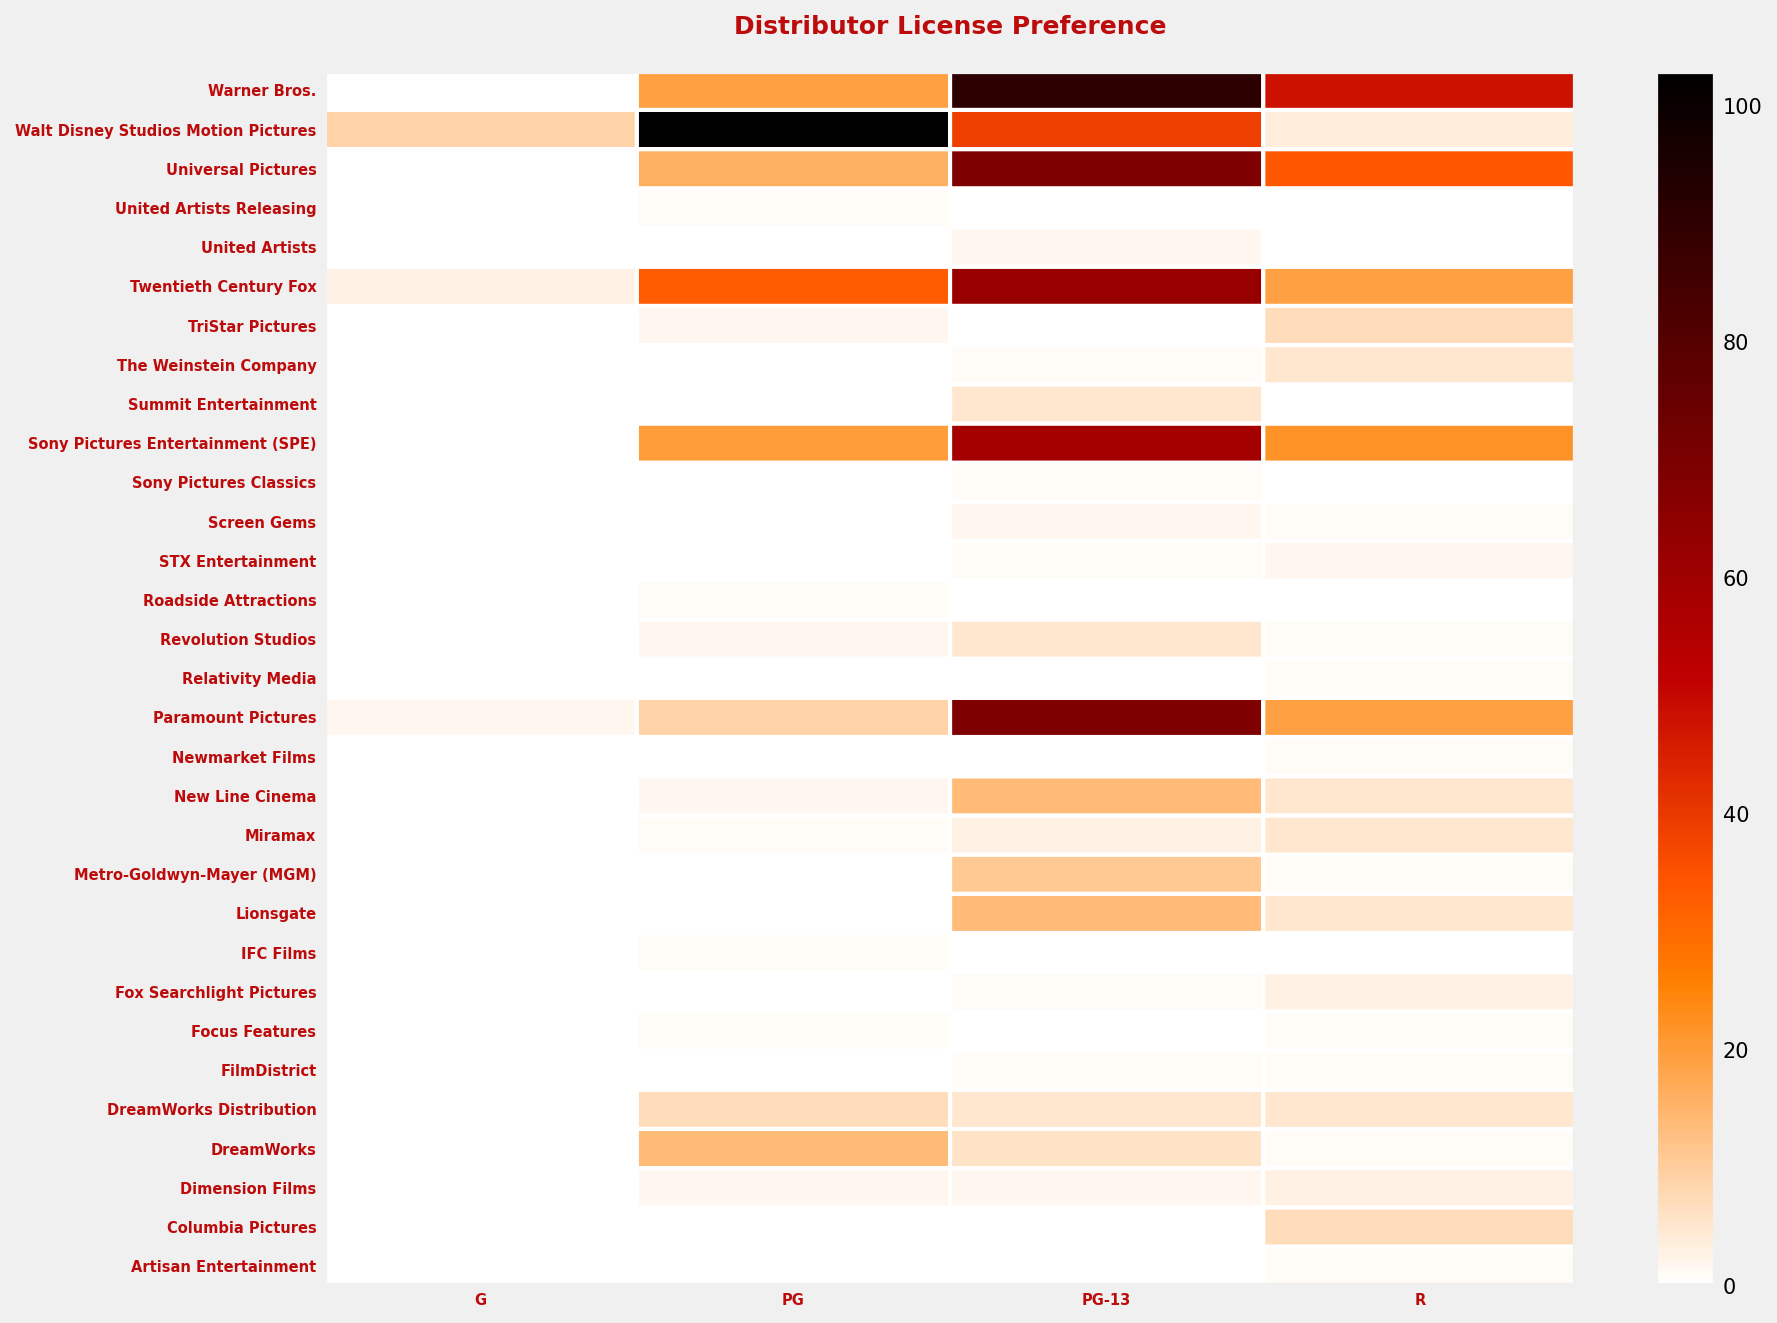

In [ ]:
df_corr = data.groupby('Distributor')['License'].value_counts().unstack().fillna(0)
plt.figure(figsize=(12, 10), dpi = 150)
plt.pcolor(df_corr, cmap='gist_heat_r', edgecolors='white', linewidths=2)
plt.xticks(np.arange(0.5, len(df_corr.columns), 1), df_corr.columns, fontsize=7 , fontweight='bold', color = '#bd0b0b')
plt.yticks(np.arange(0.5, len(df_corr.index), 1), df_corr.index, fontsize=7 , fontweight='bold', color = '#bd0b0b')

plt.title('Distributor License Preference', fontsize=12, fontweight='bold', position=(0.50, 1.0+0.02), color = '#bd0b0b')
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=10) 
cbar.ax.minorticks_on()
plt.show()

## **Observations:**
- **Warner Bros** usually go with **PG-13 license** for their movies
- **Walt Disney Studios** Prefers **PG** license for their movies.
- Most used License is PG-13
- Least used License is G

## **Number of movies Released over years**


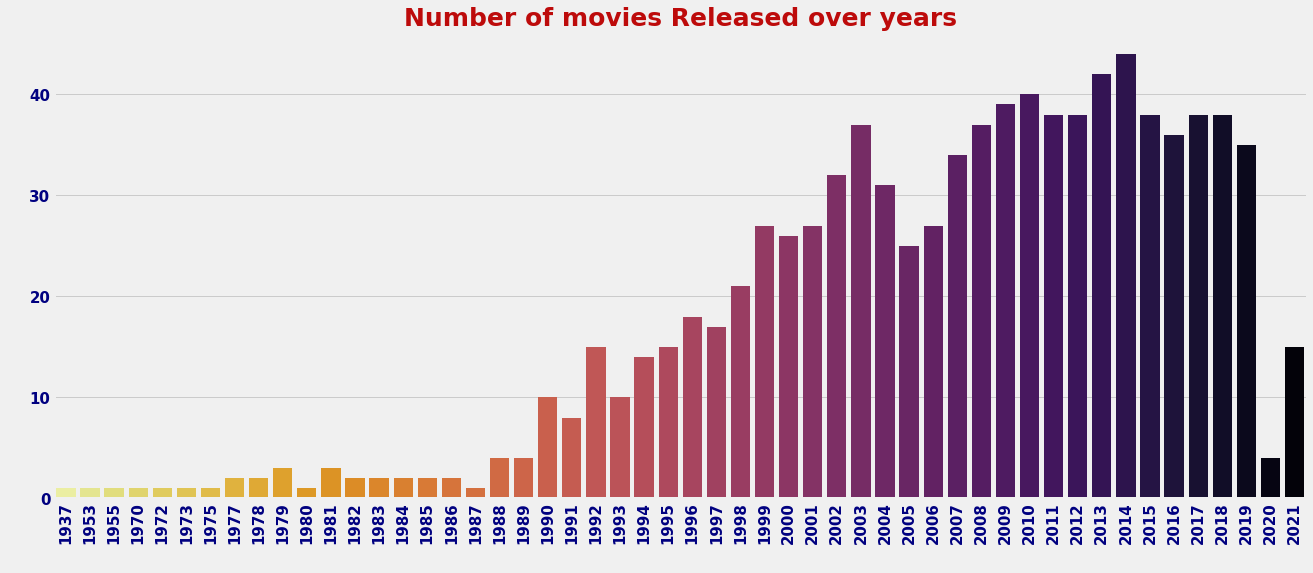

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(data = data , x = 'Year', palette = 'inferno_r')
plt.title('Number of movies Released over years', fontsize = 25, fontweight = 'bold', color = '#bd0b0b')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(fontsize = 15, fontweight = 'bold', color = 'navy', rotation = 90)
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'navy');

## **Observations:**
- **Highest movies released was on 2014.**
- **Sudden drop in movies release on 2020 was due to covid pandamic** and on 2021 it started rising slowly.
- Over the years more and more movies were released.

# **Word Clouds of Genre**

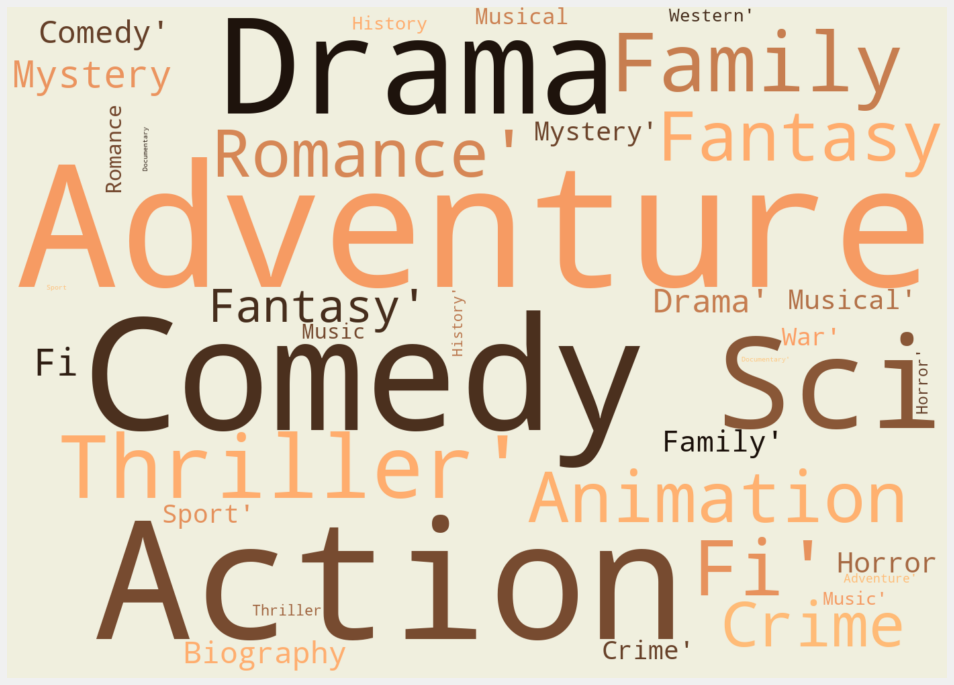

In [ ]:
list_ = []
for i in data.Moviegenres:
  list_.append(" ".join(i))

plt.figure(figsize = (15,15)) 
wordcld = WordCloud(max_words = 7000 , width = 1400 ,background_color = '#F0EFDE', height = 1000,colormap='copper_r',collocations=False ).generate((str(list_)))
plt.imshow(wordcld , interpolation = 'bilinear')

plt.axis("off")
plt.show()

## **Observations:**
- We see that popular genres are comedy, Action, Adventure, Drama, Sci-fi

In [ ]:
data = data.drop('RowNumber', axis = 1).reset_index().rename({'index': 'RowNumber'}, axis =1)
df = data.drop('Moviegenres', axis =1)
df.to_csv('movie_data.csv', index=False)